<a href="https://colab.research.google.com/github/jlule/Machine_Learning_module-2/blob/main/final_module_2_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bring in the data
import pandas as pd
import seaborn as sns
dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

Calculating Missing Value count

In [ ]:
# Calculating Unknown - missing - values
dataset[dataset['education'] == 'unknown']['education'].count() / dataset[dataset['education'] != 'unknown']['education'].count()

0.04319806382619463

In [ ]:
dataset[dataset['job'] == 'unknown']['job'].count() / dataset[dataset['job'] != 'unknown']['job'].count()


0.007994561522773624

In [ ]:
dataset[dataset['marital'] == 'unknown']['marital'].count() / dataset[dataset['marital'] != 'unknown']['marital'].count()

0.0018648648648648648

In [ ]:
dataset[dataset['default'] == 'unknown']['default'].count() / dataset[dataset['default'] != 'unknown']['default'].count()

0.2632565430752454

In [ ]:
dataset[dataset['housing'] == 'unknown']['housing'].count() / dataset[dataset['housing'] != 'unknown']['housing'].count()

0.024713199723565997

In [ ]:
dataset[dataset['loan'] == 'unknown']['loan'].count() / dataset[dataset['loan'] != 'unknown']['loan'].count()

0.024713199723565997

In [ ]:
dataset.count()

age               37069
job               37069
marital           37069
education         37069
default           37069
housing           37069
loan              37069
contact           37069
month             37069
day_of_week       37069
campaign          37069
pdays             37069
previous          37069
poutcome          37069
emp.var.rate      37069
cons.price.idx    37069
cons.conf.idx     37069
euribor3m         37069
nr.employed       37069
y                 37069
dtype: int64

In [ ]:
# Because all of the columns that contain 'unknown' are categorical, the value 'unknown' will be treated as a valid class label
# to prevent the loss of data. https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
dataset = dataset.dropna()

# Encode our features and target as needed
#'education', 'job', 'marital', 'housing', 'loan', 'month', 'poutcome', 'euribor3m', 'age', 'default',
features = ['education', 'job', 'marital', 'housing', 'month', 'poutcome', 'euribor3m', 'age', 'default']
encoder = OneHotEncoder(handle_unknown="ignore")
X = dataset[['education', 'job', 'marital', 'housing', 'month', 'poutcome', 'euribor3m', 'age', 'default']].copy()
dataset['yes'] = dataset['y'].replace({'yes': 1, 'no': 0})

y = dataset['y']


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)
# new class distribution 
print(Counter(y_ros))

# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)
# new class distribution
print(Counter(y_rus))

# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
Oversampled: Counter({0: 9844, 1: 4922})

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Counter({'no': 32861, 'yes': 32861})
Counter({'no': 4208, 'yes': 4208})
Oversampled: Counter({'no': 32861, 'yes': 16430})
Combined Random Sampling: Counter({'no': 20537, 'yes': 16430})


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


# Split our data into training and test data, with 10% reserved for testing. While we incorporated a mix of over and undersampling in the
# previous section, we found that just using oversampling provided us with better results
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=42)

# Build the decision tree
clf = DecisionTreeClassifier(max_depth=4)

encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

# Train it
clf.fit(X_encoded, y_train)

holdout_dataset = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
holdout_X_encoded = encoder.transform(holdout_dataset[features])
y_prediction = clf.predict(holdout_X_encoded)

df = pd.DataFrame()
df['predictions'] = y_prediction

# # Test it 
#clf.score(X_test, y_test)
#df['predictions'].value_counts()
df['predictions'].value_counts()


from pathlib import Path  
filepath = Path('Main/team1-module2-predictions.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)


In [ ]:
df['predictions'].value_counts()

0    337
1     73
Name: predictions, dtype: int64

In [ ]:
print(clf.feature_importances_)

[2.20264800e-04 1.27635958e-04 0.00000000e+00 4.39486416e-04
 1.14189881e-01 2.82664029e-02 8.54579130e-01 2.17719907e-03
 0.00000000e+00]


# New Section

In [ ]:
for feature, importance in zip(X_train, clf.feature_importances_):
    print(feature, importance)

education 0.00022026479961604023
job 0.00012763595844568585
marital 0.0
housing 0.00043948641597030074
month 0.11418988111690002
poutcome 0.028266402867079668
euribor3m 0.8545791297746674
age 0.00217719906732095
default 0.0


In [ ]:
#Percentage of people in the dataset who said yes to the campaign
dataset[dataset['y'] == 'yes']['y'].count() / (dataset[dataset['y'] == 'yes']['y'].count() + dataset[dataset['y'] == 'no']['y'].count())

0.11351803393671261

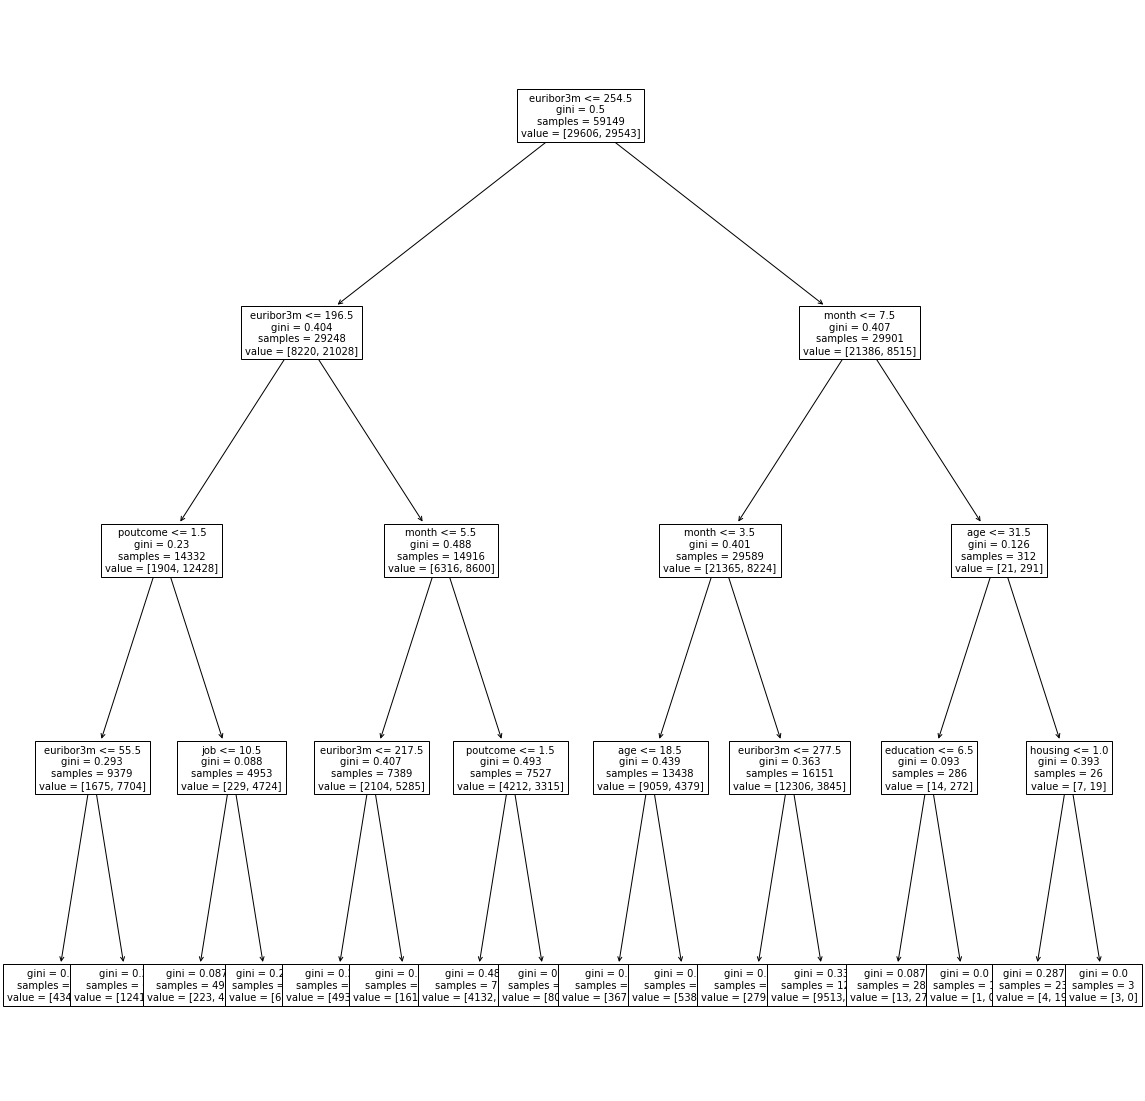

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()